# Multi-Linear Regression - One vs All

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('./Occupancy_Estimation.csv')
df["Room_Occupancy_Count"] = [1 if value else 0 for value in df["Room_Occupancy_Count"]]
X_train, X_test = train_test_split(df, test_size=0.2)

In [14]:
possible = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
            'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

base_formula = "Room_Occupancy_Count ~ "
fixed_features = []
adjusted_train_R_squared = []
models = []

number_of_features = len(possible)

for k in range(number_of_features):
    best = ["", 0, "", None]
    
    for factor in possible:
        formula = base_formula + ("" if k == 0 else "+ ") + factor
        model = smf.ols(formula=formula, data=X_train).fit()
        if(model.rsquared_adj > best[1]):
            best = [factor, model.rsquared_adj, formula, model]
    
    fixed_features.append(best[0])
    possible.remove(best[0])
    adjusted_train_R_squared.append(best[1])
    base_formula = best[2] + " "
    models.append(best[3])

print(base_formula)
models[number_of_features-1].summary()

Room_Occupancy_Count ~ S1_Light + S2_Light + S7_PIR + S5_CO2_Slope + S3_Temp + S4_Temp + S3_Light + S6_PIR + S2_Temp + S4_Light + S4_Sound + S2_Sound + S1_Sound + S3_Sound + S5_CO2 + S1_Temp 


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.939
Model:                              OLS   Adj. R-squared:                  0.939
Method:                   Least Squares   F-statistic:                     7778.
Date:                  Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                          11:59:31   Log-Likelihood:                 7517.6
No. Observations:                  8103   AIC:                        -1.500e+04
Df Residuals:                      8086   BIC:                        -1.488e+04
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.3242      0.193    -12.046      0.000      -2.702      -1.946
S1_Light         0.0082   6.65e-05    123.962      0.000       0.008       0.008
S2_Light        -0.0022   3.63e-05    -59.472      0.000      -0.002      -0.002
S7_PIR           0.1359      0.006     23.047      0.000       0.124       0.147
S5_CO2_Slope     0.0601      0.001     46.516      0.000       0.058       0.063
S3_Temp          0.3207      0.011     29.888      0.000       0.300       0.342
S4_Temp         -0.2648      0.008    -35.135      0.000      -0.280      -0.250
S3_Light        -0.0011   4.57e-05    -23.790      0.000      -0.001      -0.001
S6_PIR           0.0689      0.005     13.043      0.000       0.059       0.079
S2_Temp          0.0361      0.004      9.812      0.000       0.029       0.043
S4_Light         0.0005   9.67e-05      4.656      0.000       0.000       0.001
S4_Sound        -0.1334      0.014     -9.369      0.000      -0.161      -0.105
S2_Sound         0.0576      0.006      9.645      0.000       0.046       0.069
S1_Sound         0.0361      0.005      7.422      0.000       0.027       0.046
S3_Sound        -0.0187      0.004     -4.400      0.000      -0.027      -0.010
S5_CO2       -1.155e-05   1.39e-05     -0.832      0.405   -3.87e-05    1.56e-05
S1_Temp          0.0096      0.017      0.579      0.562      -0.023       0.042
==============================================================================
Omnibus:                     4443.811   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103907.002
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      20.009   Cond. No.                     9.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Adjusted R-squared [0.8566698453873532, 0.8746990991996255, 0.8961728835179901, 0.904727450348196, 0.9141451775676847, 0.9242640524420346, 0.9335707516559668, 0.9356595416162391, 0.9365318923021764, 0.9372172050719553, 0.9375515706322437, 0.9383890729935829, 0.9387386213330926, 0.9388793932897392, 0.93887518059816, 0.9388701596632123]
Testing Adjusted R-squared [0.8796608632325698, 0.8961845225875124, 0.9152489210534862, 0.9202888232782256, 0.9253670776770971, 0.9327844168043742, 0.9410260057611093, 0.9422115250936681, 0.9417910076170836, 0.941682527951451, 0.9431671474363952, 0.944105269865636, 0.9438932134919714, 0.9443407094385029, 0.9443326889963216, 0.9443086487117005]


(0.8, 0.95)

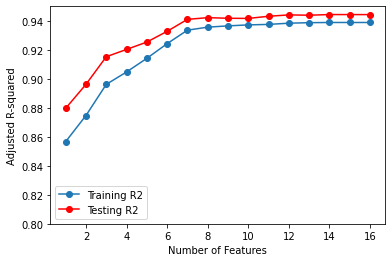

In [22]:
training_errors = []
testing_errors = []
training_residuals = []
testing_residuals = []
adjusted_test_R_squared = []

# Calculate sample size and mean
N = len(X_test["Room_Occupancy_Count"])
average = np.mean(X_test["Room_Occupancy_Count"])

# Calculate the Total Sum of Squares
TSS = sum([(i-average)**2 for i in X_test["Room_Occupancy_Count"]])

for i in range(len(models)):
    # Calculate prediction error for each model
    training_errors.append(X_train["Room_Occupancy_Count"] - models[i].predict(X_train))
    testing_errors.append(X_test["Room_Occupancy_Count"] - models[i].predict(X_test))

    # Calculate the Residuals Sum of Squares
    training_residuals.append(sum([j**2 for j in training_errors[i]]))
    testing_residuals.append(sum([j**2 for j in testing_errors[i]]))

    # Calculate Test R-Squared
    # Training R-squared is given by model and was already stored during model selection
    adjusted_test_R_squared.append(1 - (testing_residuals[i]/TSS) * (N-1)/(N-i))


print("Training Adjusted R-squared", adjusted_train_R_squared)
print("Testing Adjusted R-squared", adjusted_test_R_squared)

# Plot Adjusted R-squared values for training and testing datasets
predictors = range(1, number_of_features+1)
fig, ax = plt.subplots()
ax.plot(predictors, adjusted_train_R_squared, "o-", label="Training R2")
ax.plot(predictors, adjusted_test_R_squared, "o-", label="Testing R2", color="red")
ax.legend(loc="best")
ax.set_xlabel('Number of Features')
ax.set_ylabel('Adjusted R-squared')
ax.set_ylim([0.80,0.95])

Training Residuals Sum of Squares [174.27011383653368, 152.33016953511057, 126.20858718623177, 115.79565765101859, 104.33632771779499, 92.02785006437573, 80.70917440464166, 78.16171213648086, 77.09244218724336, 76.25059429736481, 75.83512980933517, 74.80884994371712, 74.3752288437017, 74.19514920645162, 74.19108893339332, 74.18800829096408]
Testing Residuals Sum of Squares [39.4453862303371, 34.01237925207268, 27.752724466349978, 26.089453569142144, 24.415267022145905, 21.97789856382216, 19.273553444157642, 18.87675903776335, 19.004704596057458, 19.030687071720156, 18.537017610050032, 18.221989586849, 18.282043652042834, 18.127224831778907, 18.120830567797086, 18.119645897998158]


Text(0, 0.5, 'Residuals Sum of Squares')

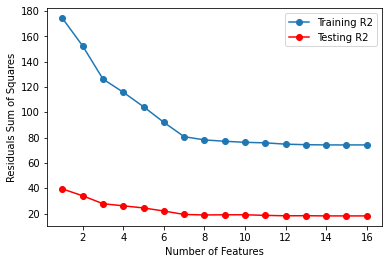

In [16]:
print("Training Residuals Sum of Squares", training_residuals)
print("Testing Residuals Sum of Squares", testing_residuals)

fig, ax = plt.subplots()
ax.plot(predictors, training_residuals, "o-", label="Training R2")
ax.plot(predictors, testing_residuals, "o-", label="Testing R2", color="red")
ax.legend(loc="best")

ax.set_xlabel('Number of Features')
ax.set_ylabel('Residuals Sum of Squares')

## Multi-linear Regression with Interactions

The first five features Achieved a good R<sup>2</sup> value: <br> 
`Room_Occupancy_Count ~ S1_Light + S2_Light + S7_PIR + S5_CO2_Slope + S3_Temp`

In [25]:
formula = "Room_Occupancy_Count ~ S1_Light * S2_Light * S7_PIR * S5_CO2_Slope * S3_Temp"
interaction_model = smf.ols(formula=formula, data=X_train).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.963
Model:                              OLS   Adj. R-squared:                  0.963
Method:                   Least Squares   F-statistic:                     6734.
Date:                  Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                          12:02:25   Log-Likelihood:                 9519.6
No. Observations:                  8103   AIC:                        -1.898e+04
Df Residuals:                      8071   BIC:                        -1.875e+04
Df Model:                            31                                         
Covariance Type:              nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -2.1230      0.096    -22.056      0.000      -2.312      -1.934
S1_Light                                          0.0338      0.003     12.049      0.000       0.028       0.039
S2_Light                                         -0.1886      0.011    -16.872      0.000      -0.210      -0.167
S1_Light:S2_Light                                 0.0011   7.14e-05     15.168      0.000       0.001       0.001
S7_PIR                                           44.0528      1.847     23.846      0.000      40.431      47.674
S1_Light:S7_PIR                                  -0.4138      0.018    -23.632      0.000      -0.448      -0.379
S2_Light:S7_PIR                                   0.0432      0.063      0.690      0.490      -0.079       0.166
S1_Light:S2_Light:S7_PIR                          0.0003      0.000      0.851      0.395      -0.000       0.001
S5_CO2_Slope                                     -0.6045      0.130     -4.659      0.000      -0.859      -0.350
S1_Light:S5_CO2_Slope                            -0.0104      0.004     -2.640      0.008      -0.018      -0.003
S2_Light:S5_CO2_Slope                             0.2173      0.020     10.895      0.000       0.178       0.256
S1_Light:S2_Light:S5_CO2_Slope                   -0.0013      0.000    -10.718      0.000      -0.002      -0.001
S7_PIR:S5_CO2_Slope                             -14.0223      1.201    -11.679      0.000     -16.376     -11.669
S1_Light:S7_PIR:S5_CO2_Slope                      0.1719      0.014     11.963      0.000       0.144       0.200
S2_Light:S7_PIR:S5_CO2_Slope                     -0.1939      0.045     -4.351      0.000      -0.281      -0.107
S1_Light:S2_Light:S7_PIR:S5_CO2_Slope             0.0009      0.000      3.176      0.001       0.000       0.001
S3_Temp                                           0.0859      0.004     22.182      0.000       0.078       0.094
S1_Light:S3_Temp                                 -0.0010      0.000     -9.024      0.000      -0.001      -0.001
S2_Light:S3_Temp                                  0.0072      0.000     16.265      0.000       0.006       0.008
S1_Light:S2_Light:S3_Temp                     -4.163e-05   2.83e-06    -14.714      0.000   -4.72e-05   -3.61e-05
S7_PIR:S3_Temp                                   -1.6956      0.072    -23.524      0.000      -1.837      -1.554
S1_Light:S7_PIR:S3_Temp                           0.0159      0.001     23.322      0.000       0.015       0.017
S2_Light:S7_PIR:S3_Temp                          -0.0015      0.002     -0.623      0.534      -0.006       0.003
S1_Light:S2_Light:S7_PIR:S3_Temp              -1.378e-05   1.52e-05     -0.906      0.365   -4.36

Significant improvement, but has too many interactions

In [28]:
# Only two-way interactions
# Room_Occupancy_Count ~ S1_Light + S2_Light + S7_PIR + S5_CO2_Slope + S3_Temp
formula =  "Room_Occupancy_Count ~ "
formula += "S1_Light * S2_Light + "
formula += "S1_Light * S7_PIR + "
formula += "S1_Light * S5_CO2_Slope + "
formula += "S1_Light * S3_Temp + "

formula += "S2_Light * S7_PIR + "
formula += "S2_Light * S5_CO2_Slope + "
formula += "S2_Light * S3_Temp + "

formula += "S7_PIR * S5_CO2_Slope + "
formula += "S7_PIR * S3_Temp + "
formula += "S5_CO2_Slope * S3_Temp"

reduced_interaction_model = smf.ols(formula=formula, data=X_train).fit()
reduced_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.957
Model:                              OLS   Adj. R-squared:                  0.956
Method:                   Least Squares   F-statistic:                 1.186e+04
Date:                  Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                          12:04:42   Log-Likelihood:                 8889.3
No. Observations:                  8103   AIC:                        -1.775e+04
Df Residuals:                      8087   BIC:                        -1.763e+04
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.7074      0.092    -29.416      0.000      -2.888      -2.527
S1_Light                  0.0278      0.003     10.940      0.000       0.023       0.033
S2_Light                 -0.0209      0.002     -9.787      0.000      -0.025      -0.017
S1_Light:S2_Light      3.023e-05   1.06e-06     28.435      0.000    2.81e-05    3.23e-05
S7_PIR                    4.5194      0.371     12.197      0.000       3.793       5.246
S1_Light:S7_PIR          -0.0066      0.000    -54.417      0.000      -0.007      -0.006
S5_CO2_Slope             -0.3863      0.097     -3.982      0.000      -0.577      -0.196
S1_Light:S5_CO2_Slope    -0.0005   3.26e-05    -14.458      0.000      -0.001      -0.000
S3_Temp                   0.1093      0.004     29.500      0.000       0.102       0.117
S1_Light:S3_Temp         -0.0008   9.99e-05     -7.617      0.000      -0.001      -0.001
S2_Light:S7_PIR           0.0012   6.47e-05     17.959      0.000       0.001       0.001
S2_Light:S5_CO2_Slope  7.828e-05   2.22e-05      3.534      0.000    3.49e-05       0.000
S2_Light:S3_Temp          0.0006   8.25e-05      6.960      0.000       0.000       0.001
S7_PIR:S5_CO2_Slope       0.0063      0.003      2.009      0.045       0.000       0.012
S7_PIR:S3_Temp           -0.1473      0.014    -10.189      0.000      -0.176      -0.119
S5_CO2_Slope:S3_Temp      0.0171      0.004      4.507      0.000       0.010       0.025
==============================================================================
Omnibus:                     8335.893   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1722942.281
Skew:                           4.654   Prob(JB):                         0.00
Kurtosis:                      73.827   Cond. No.                     4.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
interaction_training_error = X_train["Room_Occupancy_Count"] - interaction_model.predict(X_train)
interaction_testing_errors = X_test["Room_Occupancy_Count"] - interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares
interaction_training_residuals = sum([j**2 for j in interaction_training_error])
interaction_testing_residuals = sum([j**2 for j in interaction_testing_errors])

# Calculate Test R-Squared
# Training R-squared is given by model and was already stored during model selection
interaction_adjusted_test_R_squared = (1 - (interaction_testing_residuals/TSS) * (N-1)/(N-31))

print("5-Way Interaction Model")
print("Training Adjusted R-squared", interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", interaction_training_residuals)
print("Testing Residuals Sum of Squares", interaction_testing_residuals)

reduced_interaction_training_error = X_train["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_train)
reduced_interaction_testing_errors = X_test["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares
reduced_interaction_training_residuals = sum([j**2 for j in reduced_interaction_training_error])
reduced_interaction_testing_residuals = sum([j**2 for j in reduced_interaction_testing_errors])

# Calculate Test R-Squared
# Training R-squared is given by model and was already stored during model selection
reduced_interaction_adjusted_test_R_squared = (1 - (reduced_interaction_testing_residuals/TSS) * (N-1)/(N-31))

print()
print("2-Way Interaction Model")
print("Training Adjusted R-squared", reduced_interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", reduced_interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", reduced_interaction_training_residuals)
print("Testing Residuals Sum of Squares", reduced_interaction_testing_residuals)

5-Way Interaction Model
Training Adjusted R-squared 0.9626355379669443
Testing Adjusted R-squared 0.9748093989550267
Training Residuals Sum of Squares 45.261901421122396
Testing Residuals Sum of Squares 8.1307631430222

2-Way Interaction Model
Training Adjusted R-squared 0.9564330635436772
Testing Adjusted R-squared 0.9676987401763928
Training Residuals Sum of Squares 52.87996739814017
Testing Residuals Sum of Squares 10.425868456972628


Similar number of features/interactions as using all features without interactions <br>
R<sup>2</sup> value improved in 0.028 in training and 0.023 in testing.